# Test linear Regression
- MC Simulation
- Matus05 https://doi.org/10.1524/teme.2005.72.10_2005.584
- s(k) and u(k) behaviour


In [1]:
import numpy as np
from numpy import ndarray
from matplotlib import pyplot
import scipy.stats as stats

from empir19nrm02.tools import draw_values_gum, label_font_size, sumMC, save_fig

In [2]:
from scipy.stats import linregress
from dataclasses import dataclass

@dataclass
class RegResults:
    slope: float
    intercept: float
    r_value: float
    s_slope: float
    u_slope: float

def getLinRegOLS(x:ndarray,y:ndarray,ux:ndarray|float=None,uy:ndarray|float=None)-> RegResults:
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return RegResults(slope, intercept, r_value, std_err, 0)

# Matus05 https://doi.org/10.1524/teme.2005.72.10_2005.584

def getLinRegOLSMatus(x:ndarray,y:ndarray,ux:ndarray|float,uy:ndarray|float):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    Sxx = np.sum((x-x_mean)*(x-x_mean))
    cx = ((y-y_mean)-2*slope*(x-x_mean))/Sxx
    cy = (x-x_mean)/Sxx
    usq_k = np.sum(cx**2*ux**2)+np.sum(cy**2*uy**2)
    return RegResults(slope, intercept, r_value, std_err, np.sqrt(usq_k))

def plotLinReg(x:ndarray,y:ndarray,ux:ndarray|float=None,uy:ndarray|float=None, type=['xy', 'regline', 'uy']):
    if 'xy' in type:
        pyplot.plot(x,y, 'rx', label='Measurements')
    res = getLinRegOLS(x,y)
    if 'regline' in type:
        pyplot.plot(x,res.slope*x+res.intercept, 'g-', label='RegLine')
    if 'uy' in type:
        pyplot.errorbar(x,y, yerr=uy, fmt='none')
    if 'ux' in type:
        pyplot.errorbar(x,y, xerr=ux, fmt='none')
    pyplot.xlabel('x', fontsize=label_font_size)
    pyplot.ylabel('x', fontsize=label_font_size)
    pyplot.legend()

def evalLinReg(x,y,ux,uy):
    plotLinReg(x,y, ux=ux, uy=uy, type=['xy', 'regline', 'uy'])
    resOLS = getLinRegOLS(x,y)
    resMatus_loc = getLinRegOLSMatus(x,y,ux,uy)
    pyplot.text(6,10, 's(k)='+str(round(resOLS.s_slope,3)),fontsize=label_font_size)
    pyplot.text(6,8, 'u(k)='+str(round(resMatus_loc.u_slope,3)),fontsize=label_font_size)
    print( 'getLinRegOLS:', resOLS)
    print( 'getLinRegOLSMatus:', resMatus_loc)
    return resMatus_loc

## s(k) and u(k) behaviour

getLinRegOLS: RegResults(slope=3.00457235421389, intercept=0.27613548058987547, r_value=0.9858164492040078, s_slope=0.17050117952335528, u_slope=0)
getLinRegOLSMatus: RegResults(slope=3.00457235421389, intercept=0.27613548058987547, r_value=0.9858164492040078, s_slope=0.17050117952335528, u_slope=0.18619319808821966)


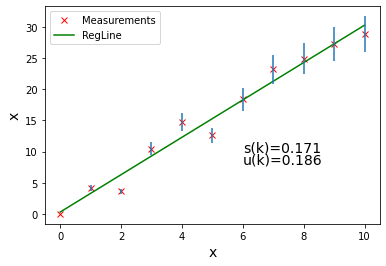

In [3]:
x = np.linspace(0,10,11)
y0 =3*x
y = y0+draw_values_gum(mean=0, stddev=2, draws=x.shape[0], distribution="normal")
ux = 0
uy = 0.1*y

resMatus = evalLinReg(x,y,ux,uy)
save_fig(dir='Poly', filename='LinReg')

## MC to compare with Matus

In [4]:
from numpy.random import default_rng

rng = default_rng()

trials = 1000

k_res = np.zeros(trials)
x_draw = uy.copy()
x_draw[:] = 0

for i in range(trials):
    rand = rng.standard_normal(x.shape[0])
    y_mc = y0 + uy*rand
    res = getLinRegOLS(x, y_mc)
    k_res[i] = res.slope

resMC = sumMC(k_res)
print ( 'k:', resMC)

print('u(k):Result from Matus:', resMatus.u_slope)
print('u(k): Result from MC:', resMC[0][1])
print('s(k): Result from OLS:', resMatus.s_slope)


k: [[3.0062261068001788, 0.18452895268725222], [2.6536866431799875, 3.370156233537029]]
u(k):Result from Matus: 0.18619319808821966
u(k): Result from MC: 0.18452895268725222
s(k): Result from OLS: 0.17050117952335528


## Perfect Mode (s(k)=0)

getLinRegOLS: RegResults(slope=3.0, intercept=0.0, r_value=1.0, s_slope=0.0, u_slope=0)
getLinRegOLSMatus: RegResults(slope=3.0, intercept=0.0, r_value=1.0, s_slope=0.0, u_slope=0.18619319808821966)


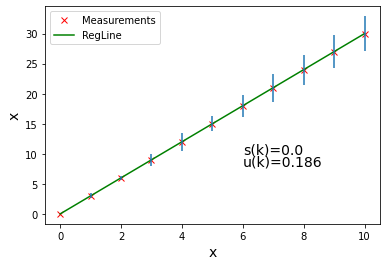

In [5]:
uy = 0.1*y
resMatus = evalLinReg(x,y0,ux,uy)
save_fig(dir='Poly', filename='LinRegs0')

## No Uncertainty but not a perfect match u(k)=0

getLinRegOLS: RegResults(slope=3.00457235421389, intercept=0.27613548058987547, r_value=0.9858164492040078, s_slope=0.17050117952335528, u_slope=0)
getLinRegOLSMatus: RegResults(slope=3.00457235421389, intercept=0.27613548058987547, r_value=0.9858164492040078, s_slope=0.17050117952335528, u_slope=0.0)


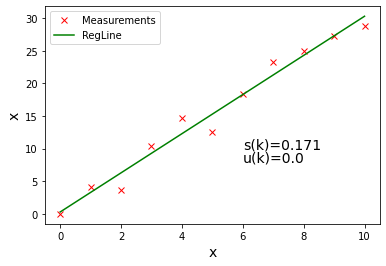

In [6]:
uy = 0*y
resMatus = evalLinReg(x,y,ux,uy)
save_fig(dir='Poly', filename='LinRegk0')